<p>
    We begin by importing the necessary python libraries to approach these various problems:
</p>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigsh

<h1>Wave Equation Simple</h1>

<p>
   Starting with the wave Equation:
    $$\frac{\partial^2 z}{\partial t^2} - c^2\nabla^2z = 0$$
    <br>
    and proceed with seperation of variables to eliminate the time dependence and write as...
    <br><br>
$$z(x,t) = z_0(x)T(t)$$
    

Or...
    
$$z = \exp{(i\omega{t})}z_0$$
<br>
Substituting into the wave equation eliminates the time component and yields an equation of the form:
<br><br>
$$\nabla^2z_0 + s^2z_0 = 0$$ where we have let $$s^2 = \frac{\omega^2}{c^2}$$
    
Note that this equation is the Helmholtz equation and solving this numerically will be the focus of the next piece of work. 
<p>

<h1>1D - Linear Matrix Equation</h1>
<p>This was the first method used to attempt to solve the Helmholtz eigenvalue problem but proves only to be useful when the constant "s" is known.
    
$$Mz = B$$
    
where z is our wave displacement, M is a Matrix operator and B is a column vector (a zero vector in this case).
    
$$(\nabla^2 + s^2)z = 0$$
<br><br>
This method is not advised (or particularly useful at all) for our work but is left here to demonstrate the solution for a linear matrix system.
<br><br>
For a similar computational cost we can obtain all eigenmodes and without specifying the value of a constant - see next solution for 1D Equation.
    
Here we simply return a graphical depiction of the first eigenmode.
</p>

In [2]:
# Code to solve 1D Linear Helmholtz Equation

# Inputs
Nx = 500 # 500 grid points in x
Lx = math.pi # Domain size

# Grid 
# Range from 0 to Lx with Nx grid points

x = np.linspace(0,Lx,Nx) # Mesh
h = x[1] - x[0] # Mesh Size

s = 1 # Constant

# Initialise matrices (eqn: Mz = B)

N = Nx # No. of unknowns

M = np.zeros((N,N)) # N rows, N columns
B = np.zeros((N,1)) # N rows, 1 column

# Left BC: at first point
i=0
n=i # nth row for this ij
M[n,n]=1 # Main diagonal
# M(n,n-1)=-1 # Off diagonal to the left 
# M(n,n+1)=-1; # Off diagonal to the right
B[n,0]=math.sin((x[i]*math.pi)/2) # BC 
     
# Right BC: at Lx
i=Nx-1
n=i # nth row for this ij
M[n,n]=1 # Main diagonal
# M(n,n-1)=-1 # Off diagonal to the left 
# M(n,n+1)=1 # Off diagonal to the right
B[n,0]=math.sin((x[i]*math.pi)/2) # BC 

# Interior points
for i in range(1, Nx-1): # Loop over x direction skipping 1st and last grid points
        n=i # Convert ij grid point to nth grid point (n refers to the nth entry of the column vector in which the matrix acts upon)
        M[n,n]=2-((s**2)*(h**2)) # Main diagonal
        M[n,n-1]=-1 # Off diagonal to the left 
        M[n,n+1]=-1 # Off diagonal to the right
        # M(n,n-Nx)=0 # Far off diagonal to the left
        # M(n,n+Nx)=0 # Far off diagonal to the left
        B[n,0] = 0 # Source term 


# Solve for z
z_vec = np.linalg.solve(M, B)

# print(M)

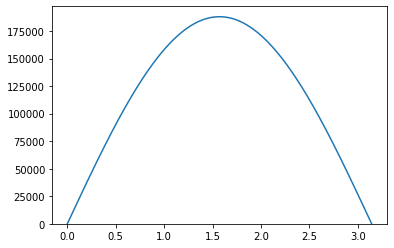

In [3]:
# Plot

plt.plot(x, z_vec)
plt.ylim(ymin=0)
plt.show()

<h1>1D Line - Helhmholtz Eigenvalue Problem</h1>
<p>After eliminating the Time Dependence from the 1D Wave Equation using seperation of variables, we arrive at the Helmholtz Equation. 
<br><br>
We solve this as an eigenvalue problem of the following form for the set of eigenmodes on a straight line:</p>
<p>$$\nabla^2z(x) = -s^2z(x)$$</p>
<p>
The CDA (Central Difference Approximation) was used to discretise the derivative term.
<br><br>
$$\frac{dz(x_i)}{dx} = \frac{z(x_{i+1})-2z(x_i)+z(x_{i-1})}{\Delta{x^2}}$$
<br><br>
Neumann boundary conditions were imposed on the system. At the spatial boundaries (x=0 and x=Nx)...
    
$$\frac{dz(x)}{dx}= 0$$ 
    
A forward/backward difference scheme was applied to the x=0 and x=Nx boundaries:
    
$$\frac{z(x_{i+1})-z(x_{i-1})}{2(\Delta{x})} = 0$$
    
A Triadiagonal Matrix was constructed from the boundary/interior approximations. 
    
We solve the triadiagonal matrix for its eigenvectors/eigenvalues and display the first 6 modes graphically.
</p>

In [4]:
# Code to solve 1D Eigenvalue Helmholtz Equation

# Inputs
Nx = 500 # 500 grid points in x
Lx = math.pi # Domain size

# Grid 
# Range from 0 to Lx with Nx grid points

x = np.linspace(0,Lx,Nx) # Mesh
h = x[1] - x[0] # Mesh Size

# Initialise matrices (eqn: Mz = B)

N = Nx # No. of unknowns

M = np.zeros((N,N)) # N rows, N columns

# Left BC: at first point
i=0
n=i # nth row for this ij
M[n,n]= 1 # Main diagonal 
M[n,n+1]=-1; # Off diagonal to the right
     
# Right BC: at Lx
i=Nx-1
n=i # nth row for this ij
M[n,n]= 1 # Main diagonal
M[n,n-1]=-1 # Off diagonal to the left

# Interior points
for i in range(1, Nx-1): # Loop over x direction skipping 1st and last grid points
        n=i # Convert ij grid point to nth grid point (n refers to the nth entry of the column vector in which the matrix acts upon)
        M[n,n]=-2/(h**2) # Main diagonal
        M[n,n-1]=1/(h**2) # Off diagonal to the left 
        M[n,n+1]=1/(h**2) # Off diagonal to the right

alpha,z = eigsh(M)

z = np.real(z)

print(z.shape)

(500, 6)


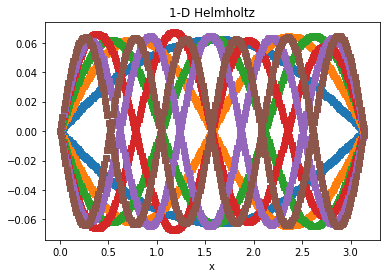

In [5]:
# Plot result

plt.plot(x,z,'s')
plt.title('1-D Helmholtz')
plt.xlabel('x')
plt.show()

<h3>Looks better in MATLAB....</h3>
<h1>2D Square - Eigenvalue Problem</h1>
<p>After eliminating the Time Dependence from the 2D Wave Equation using separation of variables, we arrive at the Helmholtz Equation. 
<br><br>
We solve this as an eigenvalue problem of the following form for the set of eigenmodes on a square (x,y) plane:</p>
<p>$$\nabla^2z(x,y) = -s^2z(x,y)$$</p>
<p>
The CDA (Central Difference Approximation) was used to discretise the derivative terms in the Laplacian.
<br><br>
$$\frac{\partial^2 z(x_i,y_j)}{\partial x^2} = \frac{z(x_{i+1},y_j)-2z(x_i,y_j)+z(x_{i-1},y_j)}{\Delta{x^2}}$$
    <br>
$$\frac{\partial^2 z(x_i,y_j)}{\partial y^2} = \frac{z(x_{i},y_{j+1})-2z(x_i,y_j)+z(x_{i},y_{j-1})}{\Delta{y^2}}$$
<br><br>
Neumann boundary conditions were imposed on the system. At the spatial boundaries ie. edges of the square (x=0 and x=Nx for all y, y=0 and y=Ly for all x)...
    
$$\frac{\partial z(x_i,y_j)}{\partial x} = 0$$
 
$$\frac{\partial z(x_i,y_j)}{\partial y} = 0$$ 

    
A forward/backward difference scheme was applied to the boundaries:
    
$$\frac{z(x_{i+1},y_j)-z(x_{i-1},y_j)}{2(\Delta{x})} = 0$$
    <br>
$$\frac{z(x_{i},y_{j+1})-z(x_{i},y_{j-1})}{2(\Delta{y})} = 0$$
    
A Tridiagonal Matrix was constructed from the boundary/interior approximations. 
    
We solve the tridiagonal matrix for its eigenvectors/eigenvalues and display the first 6 modes graphically.
</p>

In [6]:
# 2D Helmholtz Equation for Square Plate

# Simple function for accessing eigenstates of system

def reshape(eigenstate):
    return np.reshape(z[:,eigenstate], (Nx,Ny))

#Inputs

Nx=50 # grid points in x and y 
Ny=50
Lx=math.pi # Domain size
Ly=math.pi

# Grid
# Range from 0 to Lx with Nx grid points

x = np.linspace(0,Lx,Nx) # Mesh
y = np.linspace(0,Ly,Ny)

dx = x[1] - x[0] # Mesh Size
dy = y[1] - y[0]

# Initialise matrices

N = Nx*Ny # no. of unknowns

M = np.zeros((N,N)) # N rows, N columns
M.astype(float)

# Interior points
for i in range(1,Nx-1): # Loop over x direction skipping 1st and last grid points
    for j in range(1,Ny-1): # Loop over y direction skipping first and last grid points
        n=i+(j-1)*Nx # Convert ij grid point to nth grid point (n refers to the nth entry of the column vector in which the matrix acts upon)
        M[n,n]=-2*((1/(dx)**2) + (1/(dy)**2)) # Main diagonal
        M[n,n-1]=1/((dx)**2) # Off diagonal to the left ie. point i-1, j
        M[n,n+1]=1/((dx)**2) # Off diagonal to the right ie. point i+1, j
        M[n,n-Nx]=1/((dy)**2) # Far off diagonal to the left ie. point i, j-1
        M[n,n+Nx]=1/((dy)**2) # Far off diagonal to the left ie. point i, j+1

# Boundary Conditions

# Left BC: 
i=0
for j in range(0,Ny):
    n=i+(j-1)*Nx # nth row for this ij
    M[n,n]=1 # Main diagonal
    M[n,n+1]=1 #Off diagonal to the right ie. point i+1, j

     
# Right BC: 
i=Nx-1
for j in range(0,Ny):
    n=i+(j-1)*Nx # nth row for this ij
    M[n,n]=1 # Main diagonal
    M[n,n-1]=1


# Bottom BC: 
j=0
for i in range(0,Nx):
    n=i+(j-1)*Nx # nth row for this ij
    M[n,n]=1 # Main diagonal
    M[n,n+Nx]=1


# Top BC: 
j=Ny-1
for i in range(0,Nx):
    n=i+(j-1)*Nx # nth row for this ij
    M[n,n]=1 # Main diagonal
    M[n,n-Nx]=1    
    
# Solve for z
alpha,z = eigsh(M)

z = np.real(z)
alpha = np.real(alpha)

z_5 = reshape(5)

# print(z_5.shape)
print('E-value:', alpha)

E-value: [-1944.25862304 -1941.23688754 -1941.20459063 -1938.24047879
 -1936.31217969 -1936.10477015]


Text(0.5, 0.92, '2-D Helmholtz')

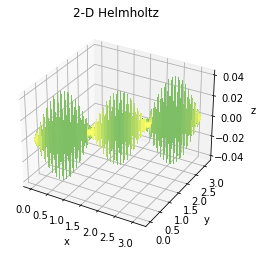

In [7]:
# Plot result 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z_5, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('2-D Helmholtz')

<h1>2D Circle - Eigenvalue Problem in Polar Co-ordinates</h1>
<p>After eliminating the Time Dependence from the 2D Wave Equation using separation of variables, we arrive at the Helmholtz Equation.
<br><br>
We solve this as an eigenvalue problem of the following form for the set of eigenmodes on a polar (r,$\theta$) plane:</p>
<p>$$\nabla^2z(r,\theta) = -s^2z(r,\theta)$$</p>
<p>
The CDA (Central Difference Approximation) was used to discretise the derivative terms in the Laplacian.
<br><br>
$$\frac{\partial^2 z(r_i,\theta_j)}{\partial r^2} = \frac{z(r_{i+1},\theta_j)-2z(r_i,\theta_j)+z(r_{i-1},\theta_j)}{\Delta{r^2}}$$
    <br>
$$\frac{\partial^2 z(r_i,\theta_j)}{\partial \theta^2} = \frac{z(r_{i},\theta_{j+1})-2z(r_i,\theta_j)+z(r_{i},\theta_{j-1})}{\Delta{\theta^2}}$$
<br><br>
Neumann boundary conditions were imposed on the system. At the spatial boundaries ie. edge of the circle (r=1 for all $\theta$ and no boundary condition at the centre)...
    
$$\frac{\partial z(r_i,\theta_j)}{\partial r} = 0$$

    
A backward difference scheme was applied to the boundary:
    
$$\frac{z(r_{i},\theta_{j+1})-z(r_{i-1},\theta_{j})}{2(\Delta{r})} = 0$$
    
A Tridiagonal Matrix was constructed from the boundary/interior approximations. 
    
We solve the tridiagonal matrix for its eigenvectors/eigenvalues and display the first 6 modes graphically.
</p>

In [8]:
# Code to solve 2D Polar Helmholtz Equation

# Simple function for accessing eigenstates of system

def reshape(eigenstate):
    return np.reshape(z[:,eigenstate], (Nr,Ntheta))

# Inputs
Nr = 50 # r grid points
Ntheta = 50 # Theta grid points
N = Nr * Ntheta # 2500 grid points per row / column
Lr = 100 # Domain size
Ltheta = math.pi * 2 # Theta ranges from 0 to 2pi

# Grid 
# Range from 0 to L with N grid points

r = np.linspace(50,Lr,Nr) # Mesh
theta = np.linspace(0,Ltheta, Ntheta)
dr = r[1] - r[0] # Mesh Size
dtheta = theta[1] - theta[0]

# Initialise matrices

M = np.zeros((N,N)) # N rows, N columns
M.astype(float)

# Interior points
for i in range(1, Nr-1): # Loop over x direction skipping 1st and last grid points
    for j in range(1, Ntheta-1): # Loop over y direction skipping 1st and last grid points
        n=i+(j-1)*Nr # Convert ij grid point to nth grid point (n refers to the nth entry of the column vector in which the matrix acts upon)
        M[n,n]=(-2/((dr**2))-2/(r[i]**2)*(dtheta**2)) # Main diagonal
        M[n,n-1]=((1/(dr**2)) - (1/(2*r[i]*dr))) # Off diagonal to the left 
        M[n,n+1]=((1/(dr**2)) + (1/(2*r[i]*dr))) # Off diagonal to the right
        M[n,n-Nr]=(1/((r[i]**2)*(dtheta**2))) # Far off diagonal to the left
        M[n,n+Nr]=(1/((r[i]**2)*(dtheta**2))) # Far off diagonal to the left

# Outer BC
i=Nr-1
for j in range(0,Ntheta):
    n=i+(j-1)*Nr # nth row for this ij
    M[n,n]=1 # Main diagonal
    M[n,n-1]=1 # Off diagonal to the left

alpha,z = eigsh(M)

z = np.real(z)
alpha = np.real(alpha)

z_0 = reshape(0)
z_1 = reshape(1)
z_2 = reshape(2)
z_3 = reshape(3)
z_4 = reshape(4)
z_5 = reshape(5)

# print(z_5.shape)
print('E-value:', alpha)

E-value: [-3.86339564 -3.86304257 -3.86299165 -3.86250843 -3.86182359 -3.86118482]


In [9]:
# Cast r and theta values to cartesians for plotting

r, theta = np.meshgrid(r, theta)
x, y = r*np.cos(theta), r*np.sin(theta)

Text(0.5, 0.92, 'Circular Polar 2-D Helmholtz')

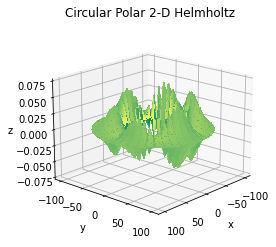

In [10]:
# Plot result

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.plot_surface(x, y, z_0, cmap='summer', linewidth=0, antialiased=False)
# ax.plot_surface(x, y, z_1, cmap='summer', linewidth=0, antialiased=False)
# ax.plot_surface(x, y, z_2, cmap='summer', linewidth=0, antialiased=False)
# ax.plot_surface(x, y, z_3, cmap='summer', linewidth=0, antialiased=False)
# ax.plot_surface(x, y, z_4, cmap='summer', linewidth=0, antialiased=False)
ax.plot_surface(x, y, z_5, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d((-0.075, 0.075))
ax.view_init(18, 42)
ax.set_title('Circular Polar 2-D Helmholtz')